In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
#import os
import matplotlib.pyplot as plt
from pathlib import Path
#import seaborn as sns
%matplotlib inline
import os

### 1 - Importação de tabelas de projeção do IBGE (2010-2060)

* Origem da tabela de projeção do IBGE
* Projeções da População do Brasil e Unidades da Federação por sexo e idade: 2010-2060

https://www.ibge.gov.br/novo-portal-destaques/27470-projecao-da-populacao-das-unidades-da-federacao-por-sexo-e-idade-simples.html
https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=resultados
  

In [2]:
# Pasta corrente
proj_ibge = Path.cwd() / 'dados' / 'Tabuas_Mortalidade 2010-2060.xls'

In [3]:
# Verifica a pasta corrente
pasta = os.getcwd()
pasta_graficos = os.path.join(pasta, "graficos")

* #### 1.1  - Leitura do arquivo da projeção do IBGE

In [4]:
colunas = ['Idade', 'nMx', 'nqx', 'nDx', 'npx', 'lx', 'nLx', 'Tx', 'ex']

df_ibge=pd.read_excel(proj_ibge,
                      names = colunas,
                      sheet_name = "Brasil",
                      skiprows = 9,
                      usecols = "U:AC")

In [5]:
# limpeza da importação: primeira: deleta as linhas com NaN. Segunda: deleta as linhas onde a coluna Idade contem Ano: e idade
df_ibge.dropna(axis=0, how='all', inplace=True)
df_ibge = df_ibge[~df_ibge['Idade'].isin(['Ano:','Idade'])]

In [6]:
df_ibge.reset_index(drop=True, inplace=True)

In [7]:
y = np.repeat(np.arange(2010, 2061), repeats=20)
y

array([2010, 2010, 2010, ..., 2060, 2060, 2060])

In [ ]:
# pd.DataFrame(np.array(predict_res).reshape(-1)) # colocar a serie em uma unica coluna

In [8]:
df_ibge = df_ibge.assign(ano=np.repeat(np.arange(2010, 2061), repeats=20))

In [9]:
df_ibge.head()

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex,ano
0,0,0.01749,0.0172159,1721.59,0.982784,100000,98453.4,7.3857e+06,73.857,2010
1,1,0.00066,0.00263212,258.681,0.997368,98278.4,392466,7.28725e+06,74.149,2010
2,5,0.0003,0.00148481,145.541,0.998515,98019.7,489735,6.89478e+06,70.3407,2010
3,10,0.00036,0.00178741,174.941,0.998213,97874.2,488934,6.40505e+06,65.4416,2010
4,15,0.0012,0.00598205,584.442,0.994018,97699.2,487035,5.91611e+06,60.5543,2010


In [10]:
df_ibge.tail()

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex,ano
1015,70,0.0212,0.100683,8147.73,0.899317,80924.2,384252,1.41362e+06,17.4685,2060
1016,75,0.0331,0.152838,11123,0.847162,72776.5,336075,1.02937e+06,14.1443,2060
1017,80,0.05164,0.228689,14099.5,0.771311,61653.5,273019,693296,11.245,2060
1018,85,0.07944,0.331388,15758.8,0.668612,47554,198373,420277,8.83789,2060
1019,90,0.14328,1,31795.2,0,31795.2,221904,221904,6.97917,2060


In [11]:
df_ibge_qx = df_ibge
df_ibge_qx = df_ibge.loc[:,['Idade', 'nqx', 'ano']].copy()

In [12]:
df_ibge_qx.head()

,Idade,nqx,ano
0,0,0.0172159,2010
1,1,0.00263212,2010
2,5,0.00148481,2010
3,10,0.00178741,2010
4,15,0.00598205,2010


In [13]:
df_ibge_qx.shape

(1020, 3)

In [14]:
df_ibge_qx_fim = df_ibge_qx.pivot(index='Idade', columns='ano', values='nqx').reset_index()
df_ibge_qx_fim.head()

ano,Idade,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,0,0.0172159,0.0164252,0.0156942,0.0150206,0.014398,0.0138234,0.0132939,0.0128053,0.0123547,...,0.00719628,0.00715703,0.00711811,0.00708254,0.00704982,0.00701786,0.00698865,0.0069612,0.00693659,0.00691366
1,1,0.00263212,0.00255453,0.00248562,0.00241037,0.00234841,0.00228361,0.00221972,0.00216518,0.00210572,...,0.00117746,0.00116475,0.00115306,0.00114302,0.00113401,0.00112804,0.00110962,0.00110253,0.00109425,0.00108809
2,5,0.00148481,0.00144942,0.00140927,0.00137761,0.00134216,0.00131134,0.00127463,0.00124556,0.00121134,...,0.000701658,0.00068318,0.000676231,0.000669555,0.000660518,0.000657349,0.000651243,0.000647532,0.00064246,0.000638036
3,10,0.00178741,0.00174617,0.00169749,0.00165701,0.00161777,0.00157513,0.00153934,0.00149668,0.00146391,...,0.000815335,0.000809178,0.000803355,0.000798046,0.000792569,0.000787275,0.00078089,0.000772159,0.000764941,0.000755369
4,15,0.00598205,0.00583226,0.00568119,0.00554143,0.00540222,0.00527262,0.00514837,0.00503363,0.00491949,...,0.00291406,0.0028884,0.00286412,0.0028494,0.00281905,0.00279844,0.00277979,0.00276266,0.00274051,0.00272787


In [16]:
# Expectativa de vida:
df_ibge_ex = df_ibge.loc[:,['Idade', 'ex', 'ano']].copy()
# Ao nascer:
df_ibge_ex0 = df_ibge_ex[(df_ibge_ex['Idade']==0) & (df_ibge_ex['ano']>=2019)& (df_ibge_ex['ano']<=2038)]

# Aos 90:
df_ibge_ex90 = df_ibge_ex[(df_ibge_ex['Idade']==90) & (df_ibge_ex['ano']>=2019)& (df_ibge_ex['ano']<=2038)]

In [17]:
df_ibge_ex0.head()

,Idade,ex,ano
180,0,76.501,2019
200,0,76.7415,2020
220,0,76.9722,2021
240,0,77.1917,2022
260,0,77.4024,2023


In [18]:
df_ibge_ex90.head()

,Idade,ex,ano
199,90,6.19657,2019
219,90,6.24192,2020
239,90,6.28574,2021
259,90,6.32773,2022
279,90,6.36722,2023


### 2 - Importação dos resultados dos qx pelo método Lee-Carter

In [19]:
# Lee-carter
'leecarter_previsao.csv'
proj_leecarter = Path.cwd() / 'resultados' / 'leecarter_previsao.csv'

In [20]:
df_leecarter = pd.read_csv(proj_leecarter, index_col=[0])
print(df_leecarter.shape)
df_leecarter.head()

(117, 20)


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038
0,0.012061,0.011490,0.010945,0.010427,0.009932,0.009462,0.009013,0.008586,0.008179,0.007792,0.007422,0.007071,0.006735,0.006416,0.006112,0.005822,0.005547,0.005284,0.005033,0.004795
1,0.000735,0.000681,0.000631,0.000585,0.000542,0.000502,0.000466,0.000431,0.000400,0.000370,0.000343,0.000318,0.000295,0.000273,0.000253,0.000235,0.000217,0.000201,0.000187,0.000173
2,0.000482,0.000452,0.000424,0.000397,0.000372,0.000349,0.000327,0.000306,0.000287,0.000269,0.000252,0.000237,0.000222,0.000208,0.000195,0.000183,0.000171,0.000160,0.000150,0.000141
3,0.000363,0.000341,0.000320,0.000301,0.000282,0.000265,0.000249,0.000234,0.000220,0.000206,0.000194,0.000182,0.000171,0.000161,0.000151,0.000142,0.000133,0.000125,0.000117,0.000110
4,0.000299,0.000282,0.000266,0.000252,0.000237,0.000224,0.000212,0.000200,0.000189,0.000178,0.000168,0.000159,0.000150,0.000141,0.000133,0.000126,0.000119,0.000112,0.000106,0.000100


#### FUNÇÕES ATUARIAIS (comum para Lee-Carter e LSTM)

* CRIAR FUNÇÃO COM AS FORMULAS ATUARIAIS, A PARTIR DOS qx's para submeter os qx, Lee-Carter e LSTM
* UM AVISO IMPORTANTE DE O PORQUê NÃO ESTIMAR PARA IDADES MAIORES QUE 90: a TÁBUA NÃO ESTÁ COMPLETA, IDADE POR IDADE (IDADE+1)

In [21]:
# FUNÇÕES ATUARIAIS
def comutacao():
    lx = []
    dx = []
    Lx = []
    Tx = []
    expx = []
    
    lx.append(100000.0)
    
    for idade in range(0, w):
        dx.append(qx[idade]*lx[idade])  # dx = qx[idade]*lx[idade]/1000.0. TESTE: TIREI O 1000
        lx.append(lx[idade]-dx[idade])  # lx[idade+1] = lx[idade] - dx[idade]

    for idade in range(0, w):
        if dx[idade] !=0.0:
            # Lx[idade] = lx[idade] + lx[idade+1]/2
            Lx.append((lx[idade] + lx[idade+1])/2)
        else:
            Lx.append(0.0)
    
    for idade in range(0, w):
        if lx[idade] != 0.0:
            # Tx = sum(Lx[idade:])
            Tx.append(sum(Lx[idade:]))
            # exp = Tx[idade]/lx[idade]
            expx.append(Tx[idade]/lx[idade])
        else:
            Tx.append(0.0)
            expx.append(0.0)

    return idade, qx, dx, lx, Lx, Tx, expx

In [22]:
# Função para unir as listas em linha
def unirSeries(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df.drop(explode, 1), how='left')

#### 2.1 - Rotina para a expectativa de vida - Método Lee-Carter

In [23]:
vetor_dados = []
dados_lee = [] # np.empty((8,0)).tolist()
ano = 2018
idade = []
ano_rept = []

for i in range(2019,2039): # Leitura de cada ANO desde 2019 ATÉ 2028
    ano += 1
    # qx das tabelas do Lee-Carter
    qx = df_leecarter[str(i)]
    w = df_leecarter.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lee.append(vetor_dados)

In [24]:
pd.DataFrame(dados_lee).shape

(20, 8)

In [25]:
df_temp = pd.DataFrame(dados_lee, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_leecarter_compl = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_leecarter_compl = df_leecarter_compl.reset_index(drop=True)

In [115]:
df_leecarter_compl.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012061,1206.140658,100000.000000,99396.929671,7.625760e+06,76.257604,2019
1,1,0.000735,72.627622,98793.859342,98757.545531,7.526363e+06,76.182503,2019
2,2,0.000482,47.595762,98721.231720,98697.433839,7.427606e+06,75.238181,2019
3,3,0.000363,35.796732,98673.635958,98655.737592,7.328908e+06,74.274232,2019
4,4,0.000299,29.486842,98637.839226,98623.095806,7.230253e+06,73.301005,2019


In [26]:
# Expectativa de vida:
# Ao nascer:
df_leecarter0 = df_leecarter_compl[df_leecarter_compl['idade']==0]
# Aos 90:
df_leecarter90 = df_leecarter_compl[df_leecarter_compl['idade']==90]

In [27]:
df_leecarter0.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012061,1206.140658,100000.0,99396.929671,7.625760e+06,76.257604,2019
117,0,0.011490,1148.978909,100000.0,99425.510546,7.649510e+06,76.495098,2020
234,0,0.010945,1094.526185,100000.0,99452.736908,7.672794e+06,76.727938,2021
351,0,0.010427,1042.654100,100000.0,99478.672950,7.695625e+06,76.956252,2022
468,0,0.009932,993.240351,100000.0,99503.379825,7.718017e+06,77.180166,2023


### 3 - Importação dos resultados dos qx pelo método LSTM

In [28]:
proj_lstm = Path.cwd() / 'resultados' / 'lstm_previsao_qx.csv'

In [29]:
df_lstm = pd.read_csv(proj_lstm, index_col=[0])
print(df_lstm.shape)
df_lstm.head()

(117, 10)


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0.011887,0.011342,0.010695,0.010430,0.010147,0.009871,0.009594,0.009318,0.009040,0.008765
1,0.000853,0.000855,0.000859,0.000857,0.000855,0.000855,0.000855,0.000855,0.000855,0.000855
2,0.000517,0.000500,0.000483,0.000476,0.000469,0.000462,0.000456,0.000450,0.000445,0.000439
3,0.000415,0.000413,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412
4,0.000337,0.000331,0.000324,0.000322,0.000321,0.000321,0.000320,0.000319,0.000319,0.000318


#### 3.1 - Rotina para a expectativa de vida - Método LSTM

In [30]:
vetor_dados = []
dados_lstm = [] # np.empty((8,0)).tolist()
ano = 2018
idade = []
ano_rept = []

for i in range(2019,2029): # Leitura de cada ANO desde 2019 ATÉ 2028
    ano += 1
    # qx das tabelas do Lee-Carter
    qx = df_lstm[str(i)]
    w = df_lstm.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lstm.append(vetor_dados)

In [31]:
pd.DataFrame(dados_lstm).shape

(10, 8)

In [32]:
df_temp = pd.DataFrame(dados_lstm, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_lstm_compl = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_lstm_compl = df_lstm_compl.reset_index(drop=True)

In [33]:
df_lstm_compl.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.011887,1188.706864,100000.000000,99405.646568,7.638754e+06,76.387539,2019
1,1,0.000853,84.301216,98811.293136,98769.142528,7.539348e+06,76.300471,2019
2,2,0.000517,51.026781,98726.991920,98701.478529,7.440579e+06,75.365196,2019
3,3,0.000415,40.919322,98675.965139,98655.505478,7.341878e+06,74.403910,2019
4,4,0.000337,33.194835,98635.045817,98618.448399,7.243222e+06,73.434569,2019


In [34]:
# Expectativa de vida:
# Ao nascer:
df_lstm0 = df_lstm_compl[df_lstm_compl['idade']==0]
# Aos 90:
df_lstm90 = df_lstm_compl[df_lstm_compl['idade']==90]

In [35]:
df_lstm0.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.011887,1188.706864,100000.0,99405.646568,7.638754e+06,76.387539,2019
117,0,0.011342,1134.248216,100000.0,99432.875892,7.648869e+06,76.488692,2020
234,0,0.010695,1069.523112,100000.0,99465.238444,7.655172e+06,76.551716,2021
351,0,0.010430,1043.007918,100000.0,99478.496041,7.667378e+06,76.673777,2022
468,0,0.010147,1014.707386,100000.0,99492.646307,7.678498e+06,76.784979,2023


### 4 - Comparar os resultados

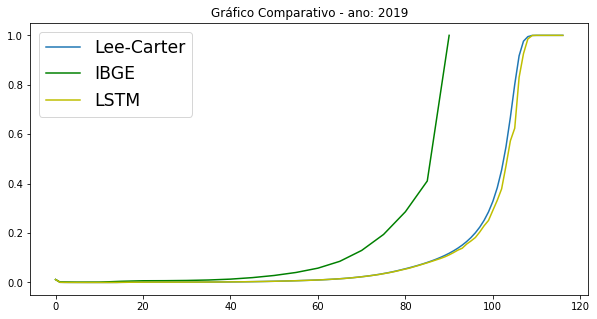

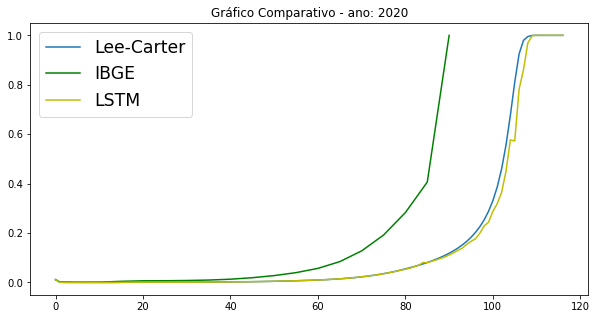

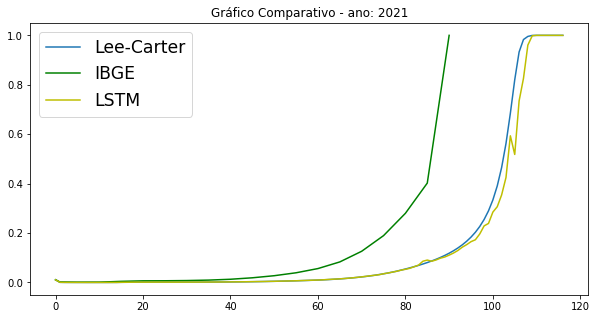

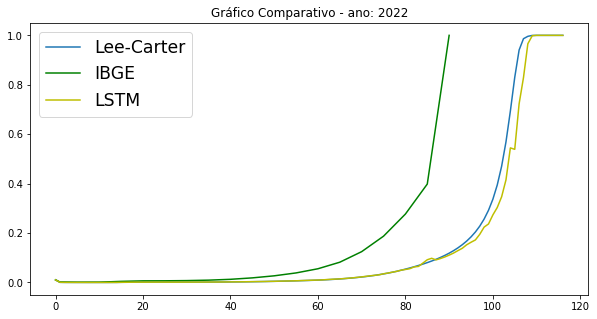

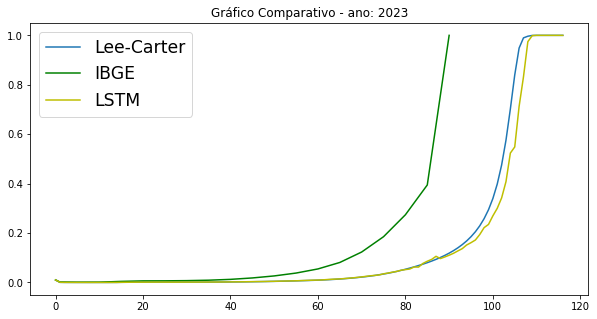

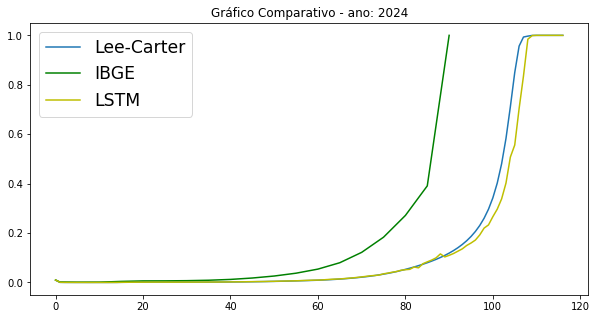

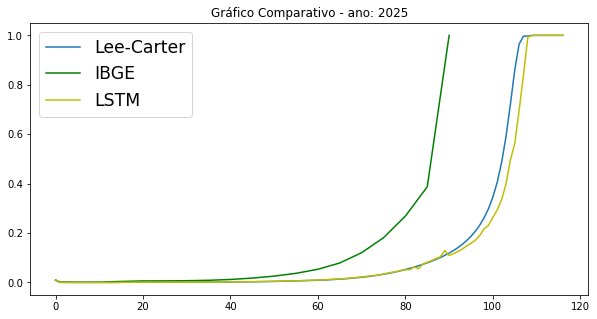

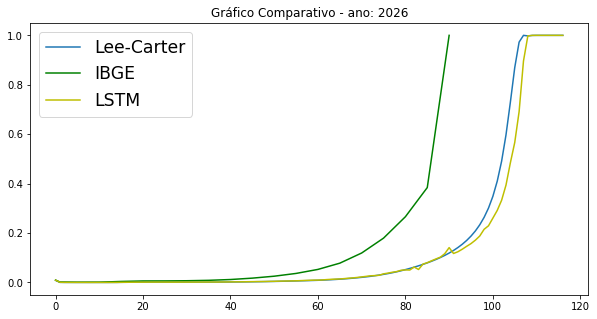

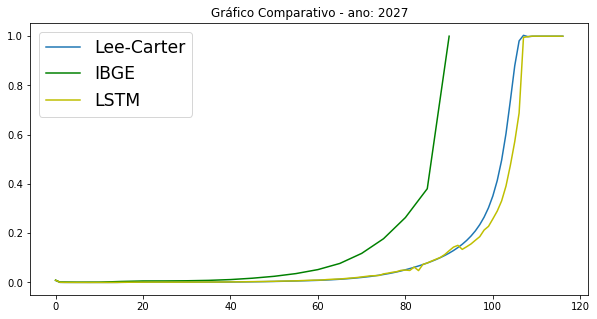

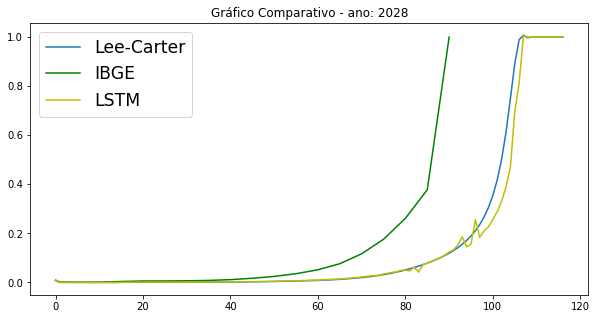

In [36]:
# Graficos
for ano in range(2019, 2029):
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.plot(df_leecarter.index, df_leecarter[str(ano)])
    ax.plot(df_ibge_qx_fim['Idade'], df_ibge_qx_fim[ano], color='g')  
    ax.plot(df_lstm.index, df_lstm[str(ano)], color='y')  
    ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM'])
    plt.title('Gráfico Comparativo - ano: %i' %ano)
    plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos'+str(ano)+'.png')
    plt.show()

In [ ]:
# Como a tábua do IBGE projetada vai somente aaté 90 anos, fica difícil tentar um ajuste para as idades mais longevas.
# Com isso, vamos visualizar um recorte pela expectativa de vida.

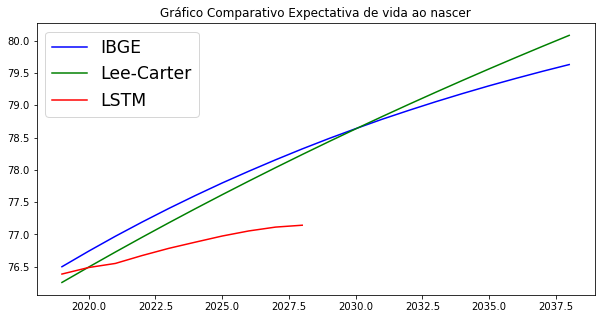

In [37]:
#Expectativa de vida ao nascer
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(df_ibge_ex0.ano, df_ibge_ex0.ex, color='b')
ax.plot(df_leecarter0.ano, df_leecarter0.expx, color='g')
ax.plot(df_lstm0.ano, df_lstm0.expx, color='r')
ax.legend(loc='best', fontsize='xx-large', labels=['IBGE', 'Lee-Carter', 'LSTM'])
plt.title('Gráfico Comparativo Expectativa de vida ao nascer')
plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer.png')
plt.show()

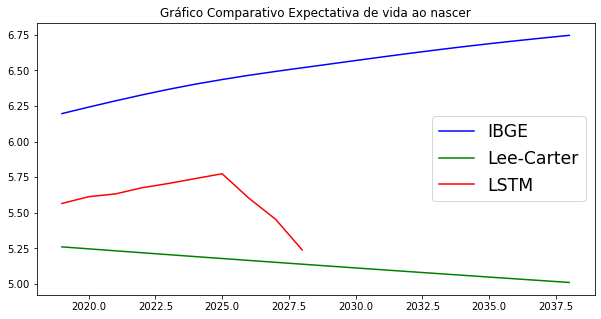

In [38]:
#Expectativa de vida da última idade (idade limite da tábua do IBGE)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(df_ibge_ex90.ano, df_ibge_ex90.ex, color='b')
ax.plot(df_leecarter90.ano, df_leecarter90.expx, color='g')
ax.plot(df_lstm90.ano, df_lstm90.expx, color='r')
ax.legend(loc='best', fontsize='xx-large', labels=['IBGE', 'Lee-Carter', 'LSTM'])
plt.title('Gráfico Comparativo Expectativa de vida ao nascer')
plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_aos90.png')
plt.show()